In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("/content/diminos_data.csv")

In [17]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [19]:
df.describe()

,order_id
count,1.500000e+04
mean,1.530610e+06
std,4.330271e+03
min,1.523111e+06
25%,1.526861e+06
50%,1.530610e+06
75%,1.534360e+06
max,1.538110e+06


In [20]:
df.isnull().sum()

,0
order_id,0
order_placed_at,0
order_delivered_at,0


In [21]:
df["order_placed_at"] = pd.to_datetime(df["order_placed_at"])  #Convert timestamps

In [22]:
df["order_delivered_at"] = pd.to_datetime(df["order_delivered_at"])

In [23]:
df = df[df["order_delivered_at"] >= df["order_placed_at"]] # remove records where delivery time is negative


In [24]:
# Create Delivery Time in Minutes
df["delivery_minutes"] = (
    df["order_delivered_at"] - df["order_placed_at"]
).dt.total_seconds() / 60


In [25]:
df.head()

,order_id,order_placed_at,order_delivered_at,delivery_minutes
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984


In [26]:
df["delivery_minutes"].describe()

,delivery_minutes
count,15000.000000
mean,20.499389
std,96.160362
min,15.000010
25%,15.274826
50%,15.797986
75%,17.279661
max,7299.831375


In [27]:
# Removing extreme outliers
df_clean = df[df["delivery_minutes"] <= 120]


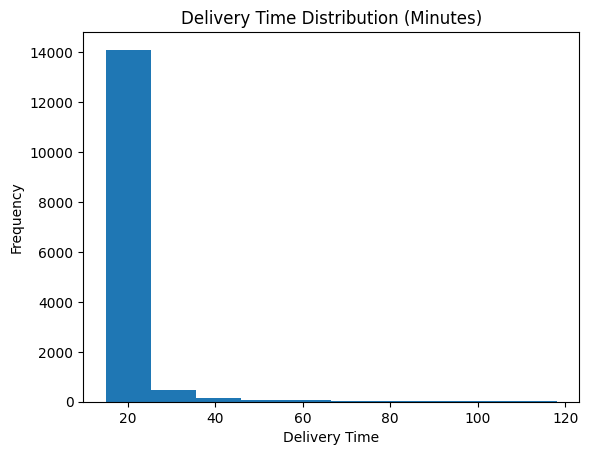

In [28]:
plt.figure()
plt.hist(df_clean["delivery_minutes"])
plt.title("Delivery Time Distribution (Minutes)")
plt.xlabel("Delivery Time")
plt.ylabel("Frequency")
plt.show()


## Histogram shows : Most deliveries are between 15 to 25 minutes.Majority of orders are delivered very fast. Store performance is strong and Very few deliveries above 30 mins. The graph stretches slowly to the right side up to around 100+ mins.This is called a Right Skewed Distribution

In [29]:
df_clean["delivery_minutes"].describe()


,delivery_minutes
count,14931.000000
mean,17.760636
std,7.144206
min,15.000010
25%,15.272876
50%,15.789953
75%,17.241652
max,118.026424


## On average, pizzas are delivered in approximately 17.7 minutes. The fastest delivery time is 15 mins. 25% of orders are delivered within 15 minutes. 50% of orders are delivered within 15.8 minutes. 75% of orders are delivered within 17.2 minutes.

In [30]:
p95 = df_clean["delivery_minutes"].quantile(0.95)
p95


np.float64(26.247372241666667)

## 95% of all pizza deliveries are completed within 26 minutes. And since Diminos requirement = must be < 31 minutes .Kanav is safely meeting performance standards.

In [31]:
df_clean["order_hour"] = df_clean["order_placed_at"].dt.hour

df_clean.groupby("order_hour")["delivery_minutes"].mean()


/tmp/ipython-input-1621185084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["order_hour"] = df_clean["order_placed_at"].dt.hour


,delivery_minutes
order_hour,
0,17.999718
1,18.181020
2,17.776776
3,17.673642
4,17.602026
5,17.440957
6,18.070150
7,17.818135
8,17.599247


## The hourly analysis shows that delivery performance remains consistently efficient throughout the day, with average delivery times fluctuating narrowly between 17.2–18.2 minutes. There are no significant peaks of delay, indicating strong operational control, proper rider allocation, and efficient order handling during both peak and non-peak hours.

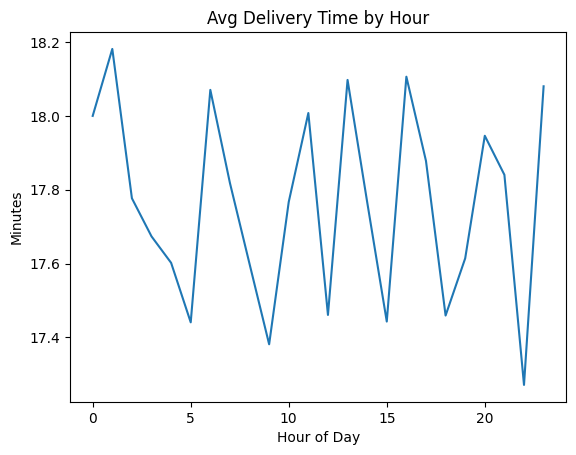

In [36]:
df_clean.groupby("order_hour")["delivery_minutes"].mean().plot(kind="line")
plt.title("Avg Delivery Time by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Minutes")
plt.show()


## The hourly trend of delivery time remains highly stable throughout the day, fluctuating only between 17.3 to 18.2 minutes. There are no major spikes indicating service delays at any particular hour. This suggests strong operational efficiency, effective resource allocation, and consistency in delivery performance across all hours.

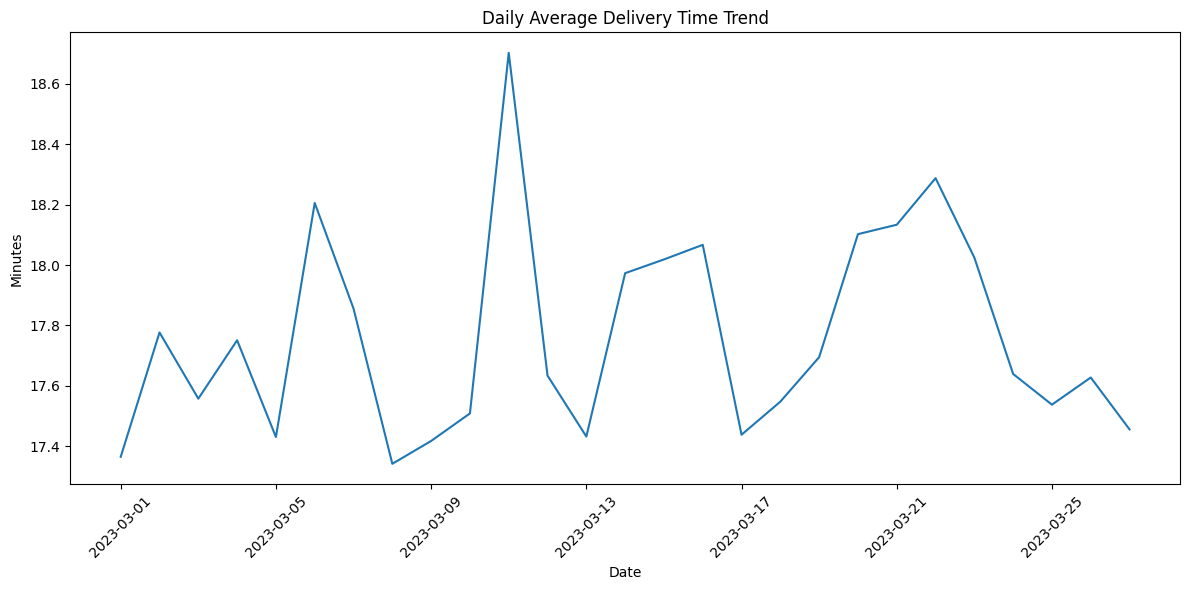

In [35]:
plt.figure(figsize=(12,6))
df_clean.groupby("order_date")["delivery_minutes"].mean().plot()

plt.title("Daily Average Delivery Time Trend")
plt.xlabel("Date")
plt.ylabel("Minutes")

plt.xticks(rotation=45)   # rotate labels
plt.tight_layout()        # adjust spacing
plt.show()



## The daily trend of average delivery time remains highly consistent throughout the month, generally fluctuating between 17.3 to 18.8 minutes. Although there is a single spike in the middle of the month, performance quickly stabilizes, indicating resilience and strong operational controls. There is no upward long-term trend, meaning the delivery efficiency is being maintained consistently over time.

# Final Conclusion

# Kanav’s store is performing exceptionally well. With a 95th percentile delivery time of approximately 26 minutes and strong consistency across hours and days, the business is operating efficiently and comfortably meeting Diminos’ benchmark of delivering within 31 minutes. Minor data irregularities exist but do not impact business performance. Overall, the store is in a healthy and safe operational state.